# Assignment1 - Stock Price Analysis and Prediction

## Step 1: Theoretical Foundations
### Basics of algorithms and problem design

<b>Basic algorithm:</b>

- An algorithm is a sequence of steps and instructions for solving problems and performing tasks.
- In data science, algorithms are often used for tasks such as data processing, analysis, and prediction.
- Basic algorithms include sorting, search, optimization and machine learning algorithms, etc.

<b>Problem design:</b>

- Problem design refers to converting real-world scenarios into problems that can be solved algorithmically.
- A good problem design should clearly define the goals, inputs, outputs, and constraints of the problem.
- In data science, this usually involves collecting data, understanding the structure of the data, and determining appropriate analysis methods or models.

### The relevance of custom problem creation in teaching and assessing knowledge

<b>Improve understanding and application skills:</b>

- Through customized questions, students can gain a deeper understanding of data science concepts.
- It enhances learning by encouraging students to apply theory to practical situations.

<b>Develop creative and critical thinking:</b>

- Customized questions require students to think from different perspectives, which helps develop innovation and problem-solving skills.
- It also encourages students to think critically and evaluate the pros and cons of different approaches.

<b>Adaptive and personalized learning:</b>

- Customized questions allow teachers to tailor difficulty and focus to students' abilities and interests.
- This approach supports personalized learning, allowing each student to learn at their own pace and interests.

### How leveraging tools like ChatGPT can be beneficial in this process

<b>Conceptual understanding and guidance:</b>

- ChatGPT can provide instant feedback and clarification to help students understand complex concepts.
- It can be used as an auxiliary tool to provide guidance on algorithms, data processing and problem solving.

<b>Ideas and problem formulation:</b>

- ChatGPT helps students generate ideas as they formulate and design their own questions.
- It can present different perspectives and methods and encourage students to think innovatively.

<b>Validate and extend learning:</b>

- Students can use ChatGPT to validate their ideas and solutions.
- It can also provide additional resources and learning materials to help students expand their knowledge and skills.

## Step 2: Introduction to the Worked Example Problem


### Dataset Overview: Tesla Stock Price Dataset

**Source and Content:**
- The dataset is sourced from Kaggle, uploaded by user Ricardo Aguirre.
- It contains historical stock market data for Tesla Inc.
- Key features in the dataset include daily opening price, highest price, lowest price, closing price, and volume.

**Significance in Data Science:**
- Stock market data is key to understanding and predicting market behaviors.
- Such data can be used for various data science applications like time series analysis, market trend prediction, risk management, etc.
- Tesla, being a highly watched company, provides stock data that is especially valuable for analyzing market responses and investor behaviors.

### Worked Example Problem

**Problem Statement:**
- "Develop a model using the Tesla stock dataset to predict the closing price of Tesla’s stock for the next day. The model should consider data from at least the previous five trading days for its prediction."

**Input-Output Format:**
- Input: The opening price, highest price, lowest price, closing price, and volume for the past five trading days.
- Output: Predicted closing price for the sixth day.

**Sample Inputs and Outputs:**
- Input Example: [Day 1: Opening Price $X1, Closing Price $Y1, Highest Price $Z1, Lowest Price $W1, Volume V1; Day 2: ...; Day 5: Opening Price $X5, Closing Price $Y5, Highest Price $Z5, Lowest Price $W5, Volume V5]
- Output Example: Predicted Closing Price for Day 6: $Y6

**Underlying Principles:**
- Time Series Analysis for analyzing data points ordered in time.
- Regression Analysis for predicting a numerical response variable.
- Feature Engineering for extracting and selecting key information from raw data.

In this problem, we aim to predict the future performance of Tesla’s stock by analyzing its performance over the past several days. This not only poses an interesting and challenging data science problem but is also crucial for financial analysis and investment decision-making.

## Step 3: Analyzing the Worked Example Problem

In [88]:
# import libraries
import numpy as np
import pandas as pd

In [89]:
# import data
data = pd.read_csv('Tesla.csv - Tesla.csv.csv')
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [91]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [92]:
data.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [93]:
different_rows = data['Close'] != data['Adj Close']
count_different = different_rows.sum()
print(f"different rows: {count_different}")

different rows: 0


We can see that the data in 'Close' and 'Adj Close' are exactly the same, so we delete the last column 'Adj Close'.

In [94]:
data.drop(columns=['Adj Close'], inplace=True)
data.head()

,Date,Open,High,Low,Close,Volume
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900


In [95]:
# set format to date
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,Open,High,Low,Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900


In [96]:
# define a function to show price
import matplotlib.pyplot as plt
def show_price(data):
    plt.figure(figsize=(10,5))
    plt.plot(data['Date'], data['Open'], label='Open Price')
    plt.plot(data['Date'], data['Close'], label='Close Price')
    plt.plot(data['Date'], data['High'], label='High Price')
    plt.plot(data['Date'], data['Low'], label='Low Price')

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Stock Prices Over Time')
    plt.legend()
    plt.show()

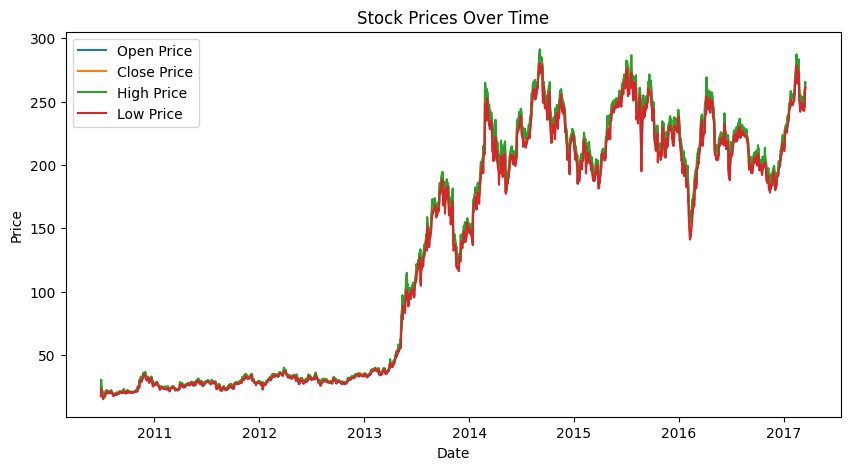

In [97]:
# showing all the data in the data set.
show_price(data)

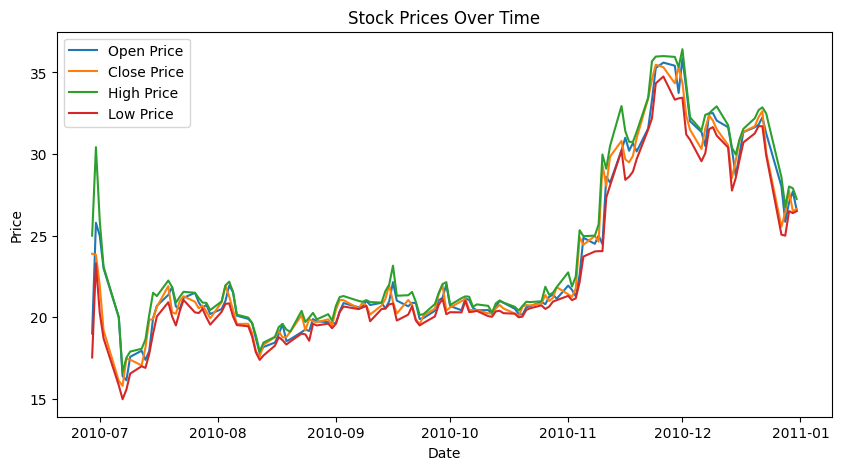

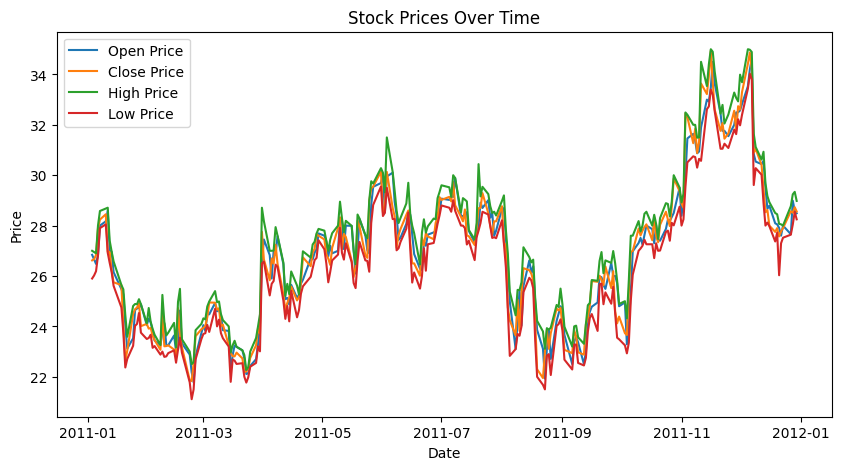

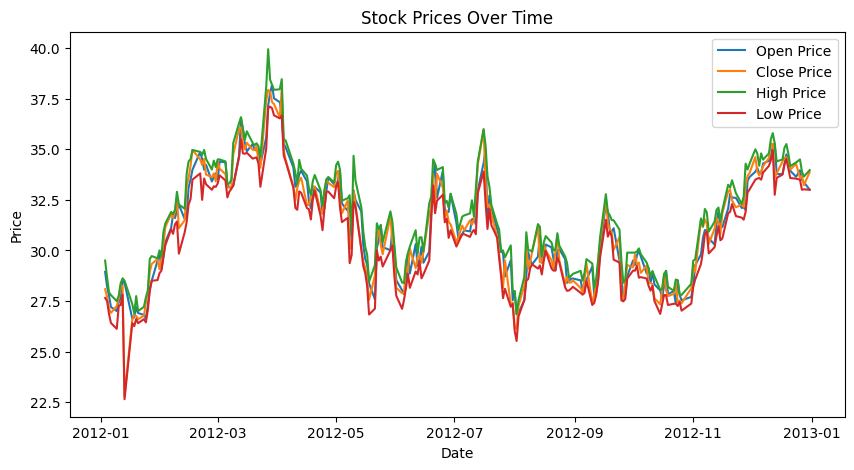

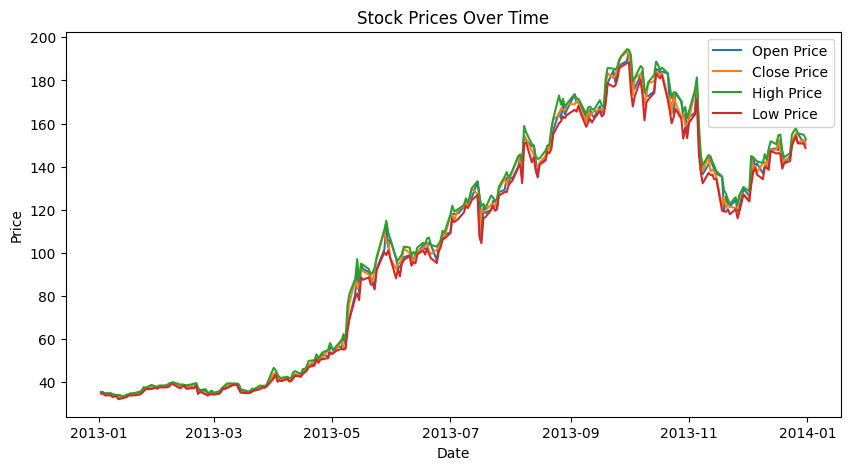

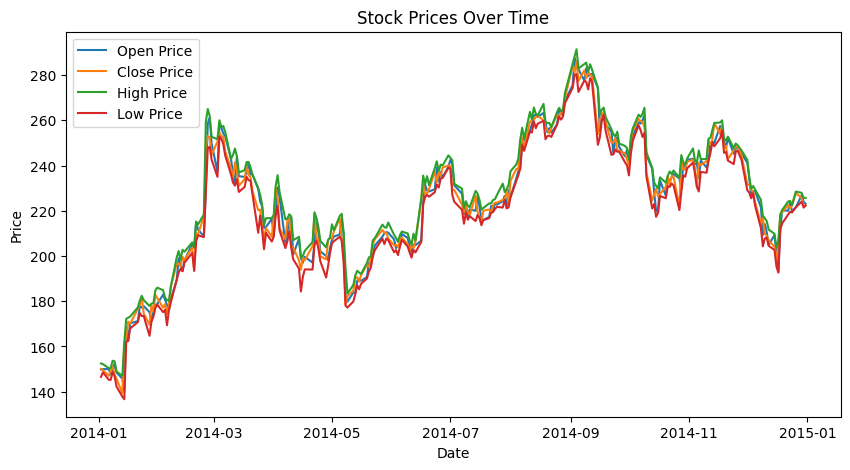

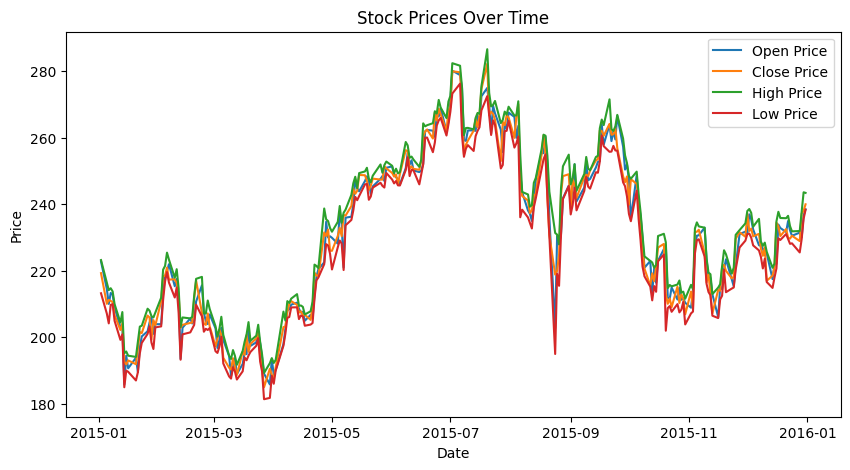

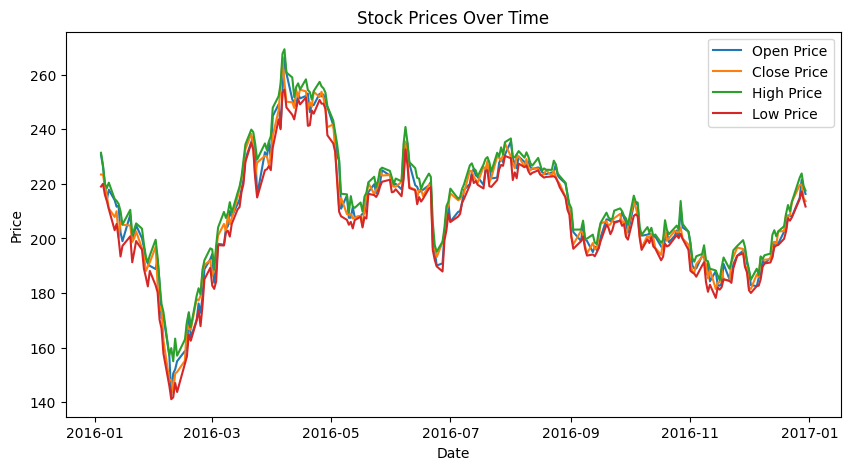

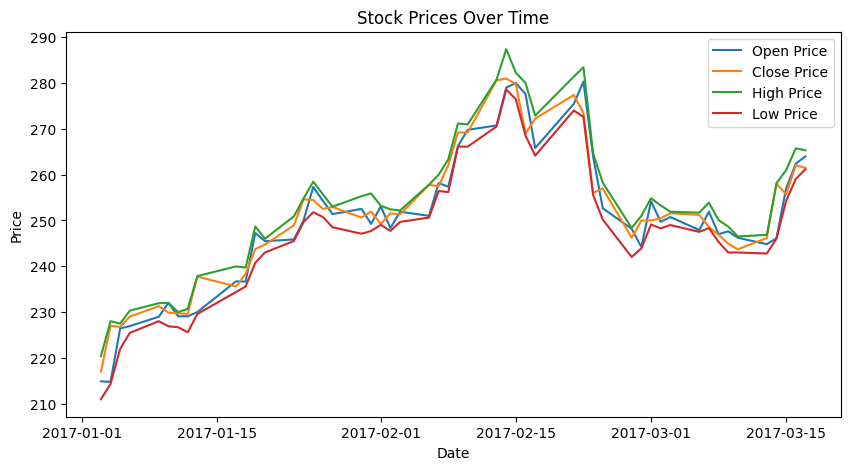

In [98]:
# Since prices fluctuate as the years increase, we plot them separately by year.
df = data
df['Year'] = df['Date'].dt.year
for year in df['Year'].unique():
    df_year = df[df['Year'] == year]
    show_price(df_year)

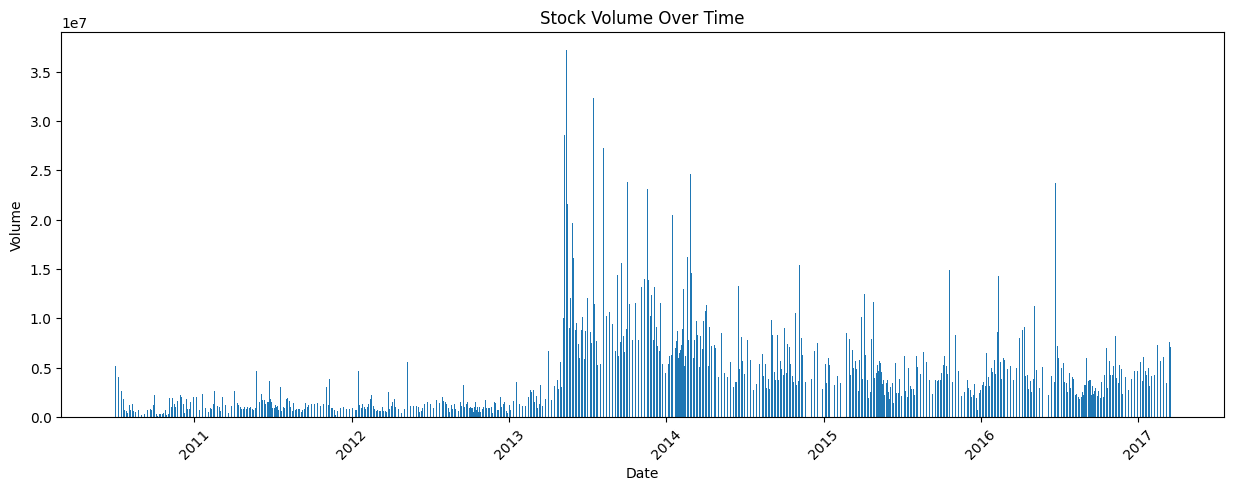

In [99]:
import matplotlib.dates as mdates
plt.figure(figsize=(15, 5))
plt.bar(data['Date'], data['Volume'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y')) 
plt.gca().xaxis.set_major_locator(mdates.YearLocator()) 
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Stock Volume Over Time')
plt.xticks(rotation=45)  
plt.show()

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Select features to use
features = data[['Open', 'High', 'Low', 'Volume']]  
target = data['Close']

# Data normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.values.reshape(-1,1))

# Divide training set and test set
split = int(0.8 * len(data))
X_train = scaled_features[:split]
X_test = scaled_features[split:]
y_train = scaled_target[:split]
y_test = scaled_target[split:]
#X_train, X_test, y_train, y_test = train_test_split(scaled_features, scaled_target, test_size=0.2, random_state=0)
y_actual = scaler.inverse_transform(y_test)

# Adjust the data format to fit the LSTM model (number of samples, time steps, number of features)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')


# train
model.fit(X_train, y_train, epochs=150, batch_size=32)

# predict
predicted_stock_price = model.predict(X_test)

# Denormalize to get the actual predicted price
predicted_stock_price_lstm = scaler.inverse_transform(predicted_stock_price)


Epoch 1/150
43/43 [==============================] - 3s 3ms/step - loss: 0.1459
Epoch 2/150
43/43 [==============================] - 0s 3ms/step - loss: 0.0245
Epoch 3/150
43/43 [==============================] - 0s 3ms/step - loss: 0.0072
Epoch 4/150
43/43 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 5/150
43/43 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 6/150
43/43 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 7/150
43/43 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 8/150
43/43 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 9/150
43/43 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 10/150
43/43 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 11/150
43/43 [==============================] - 0s 4ms/step - loss: 0.0028
Epoch 12/150
43/43 [==============================] - 0s 4ms/step - loss: 0.0027
Epoch 13/150
43/43 [=================

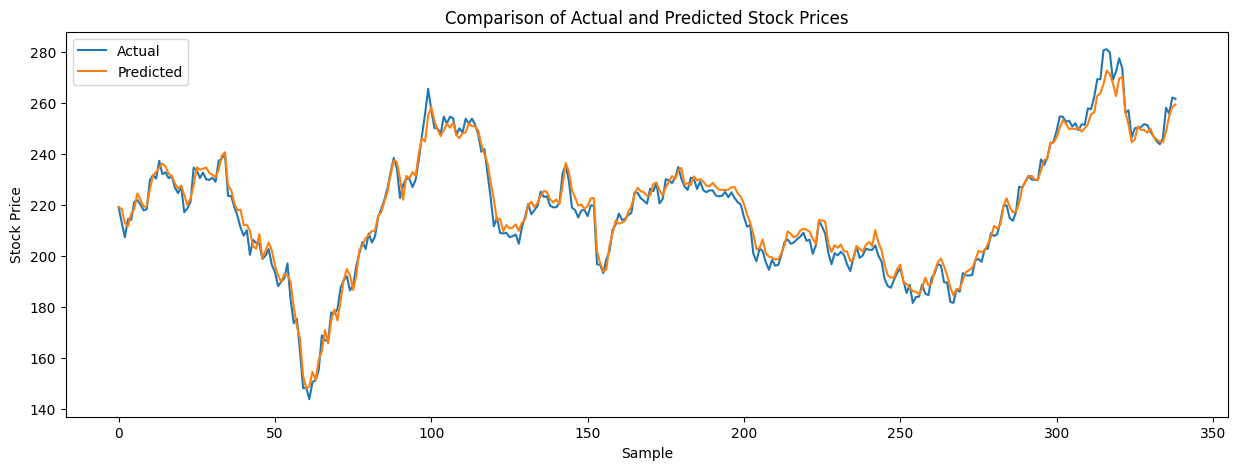

In [101]:
y_actual = scaler.inverse_transform(y_test)
y_test_series = pd.Series(y_actual.flatten(), name='Actual')
predicted_series = pd.Series(predicted_stock_price_lstm.flatten(), name='Predicted')

# Merge the actual and predicted values into a dataframe
comparison_df = pd.concat([y_test_series, predicted_series], axis=1)

# draw chart
plt.figure(figsize=(15, 5))
plt.plot(comparison_df['Actual'], label='Actual')
plt.plot(comparison_df['Predicted'], label='Predicted')
plt.title('Comparison of Actual and Predicted Stock Prices')
plt.xlabel('Sample')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## Step 4: Engaging with ChatGPT for Deeper Understanding

### Understand intricacies

- <b>Understanding LSTM: </b>
How LSTM differs from regular RNNs, its advantages in handling time series data, and why it might be suitable for stock price prediction.

- <b>Data Preprocessing: </b>
The importance of data preprocessing steps in time series forecasting, like normalization or standardization, and the creation of time lags.

- <b>Feature Selection: </b>
What features are relevant for stock price prediction and how to choose them, including technical indicators or external factors like market news.

### Potential problem scenarios

- <b>Model Optimization: </b>
Different approaches to optimize the LSTM model, such as tweaking the number of layers, units, and dropout rates.

- <b>Overfitting Concerns: </b>
Strategies to prevent overfitting in a time series model, like cross-validation techniques specific to time series data.

- <b>External Factors: </b>External factors that might affect stock prices and how to integrate them into the model, like incorporating sentiment analysis from financial news.

## Step 5: Crafting Your New Problem

<b>New problem: </b>

What advantages does LSTM have in stock forecasting? Compare with other models and adjust parameters to find a better model.

## Step 6: Solution and Justification

### Solution Explanation

**Long Short-Term Memory (LSTM) for Stock Forecasting:**

1. **Model Overview:**
   - LSTM is a type of recurrent neural network (RNN) designed to address the vanishing gradient problem in traditional RNNs.
   - It is adept at capturing long-term dependencies in time series data, making it ideal for stock price forecasting.

2. **Advantages Over Other Models:**
   - **Memory Capability:** Unlike simpler models like ARIMA or linear regression, LSTM can remember long-term patterns in data, crucial for capturing trends in stock prices that are influenced by past events.
   - **Non-Linearity:** LSTM can model complex, non-linear relationships in data. In contrast, models like SVM or linear regression might struggle with the non-linear nature of stock markets.
   - **Flexibility:** Unlike fixed-structure models (e.g., ARIMA), LSTM can adapt to various types of data dynamics through its gates, making it more versatile for different stock behaviors.

3. **Parameter Adjustment:**
   - Adjusting parameters like the number of LSTM layers, the number of units in each layer, and the dropout rate can significantly impact model performance.
   - For example, increasing the number of units can help the model capture more complex patterns but may lead to overfitting.

4. **Pseudocode for LSTM Model:**
   ```pseudo
   Initialize LSTM Model
   For each LSTM layer:
       Add LSTM layer with specified number of units
       Add Dropout for regularization
   End For
   Add Dense layer with one unit (for output)
   Compile the model with a suitable optimizer and loss function
   Train the model with historical stock price data
   Predict future stock prices using the trained model
   ```

### Proof of Correctness

1. **Historical Data Performance:**
   - Evaluate the model using historical data. The model's ability to accurately predict past stock prices, as measured by metrics like RMSE or MAE, supports its effectiveness.
   
2. **Comparative Analysis:**
   - Compare LSTM's performance with baseline models (e.g., ARIMA, linear regression). Superiority in metrics implies LSTM's better handling of time series data.
   
3. **Parameter Tuning and Validation:**
   - Use techniques like cross-validation and grid search for parameter tuning. Better performance with optimized parameters indicates LSTM's adaptability.
   
4. **Logical Justification:**
   - The stock market is influenced by long-term trends and patterns. LSTM's design to capture long-term dependencies aligns logically with the nature of stock data, providing a theoretical basis for its suitability.

In conclusion, while LSTM offers several advantages in stock forecasting due to its structure and capabilities, it's crucial to carefully adjust and validate its parameters. This ensures the model is well-tuned to the specific characteristics of the stock market data it's applied to.

## Step 7: Incorporating Coding Examples

In the previous steps, the data set has been preprocessed and divided into a training set and a test set. In this section we will continue to use this data set and compare it with the previous LSTM prediction results.

### RNN

In [102]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.SimpleRNN(50),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# train
model.fit(X_train, y_train, epochs=50, batch_size=32)

# predict
predicted_stock_price = model.predict(X_test)

# Denormalize to get the actual predicted price
predicted_stock_price_rnn = scaler.inverse_transform(predicted_stock_price)

Epoch 1/50
43/43 [==============================] - 2s 3ms/step - loss: 0.0739
Epoch 2/50
43/43 [==============================] - 0s 2ms/step - loss: 0.0161
Epoch 3/50
43/43 [==============================] - 0s 2ms/step - loss: 0.0130
Epoch 4/50
43/43 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 5/50
43/43 [==============================] - 0s 2ms/step - loss: 0.0091
Epoch 6/50
43/43 [==============================] - 0s 2ms/step - loss: 0.0073
Epoch 7/50
43/43 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 8/50
43/43 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 9/50
43/43 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 10/50
43/43 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 11/50
43/43 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 12/50
43/43 [==============================] - 0s 3ms/step - loss: 0.0044
Epoch 13/50
43/43 [==============================

### Linear

In [103]:
from sklearn.linear_model import LinearRegression
split = int(0.8 * len(data))
X_train = features[:split]
X_test = features[split:]
y_train = target[:split]
y_test = target[split:]

model = LinearRegression()
model.fit(X_train, y_train)

# predict
predicted_stock_price_linear = model.predict(X_test)

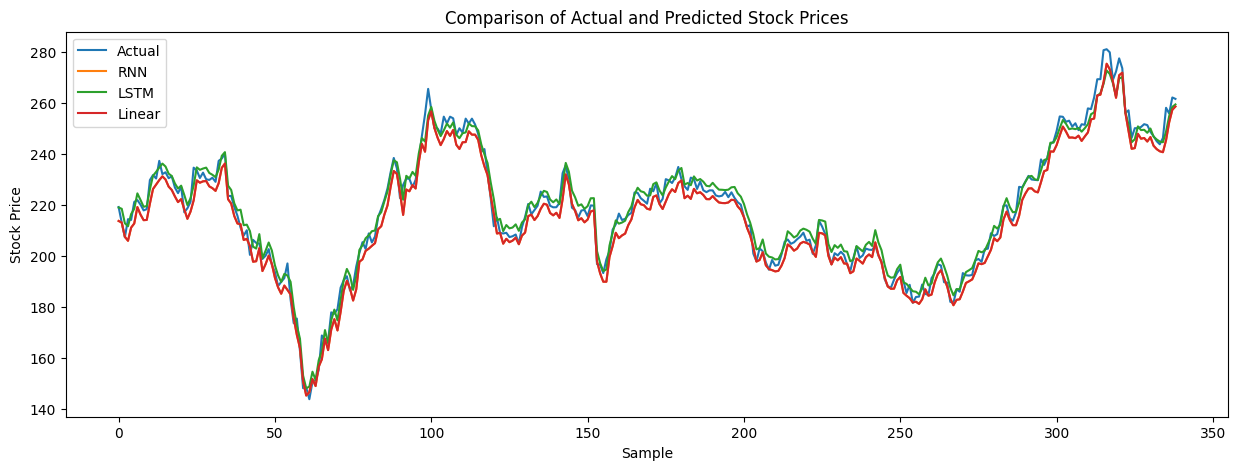

In [104]:
y_test_series = pd.Series(y_actual.flatten(), name='Actual')
predicted_series_lstm = pd.Series(predicted_stock_price_lstm.flatten(), name='Predicted_LSTM')
predicted_series_rnn = pd.Series(predicted_stock_price_rnn.flatten(), name='Predicted_RNN')
predicted_series_linear = pd.Series(predicted_stock_price_rnn.flatten(), name='Predicted_Linear')


# Merge the actual and predicted values into a dataframe
comparison_df = pd.concat([y_test_series, predicted_series_lstm, predicted_series_rnn,predicted_series_linear], axis=1)

# draw chart
plt.figure(figsize=(15, 5))
plt.plot(comparison_df['Actual'], label='Actual')
plt.plot(comparison_df['Predicted_RNN'], label='RNN')
plt.plot(comparison_df['Predicted_LSTM'], label='LSTM')
plt.plot(comparison_df['Predicted_Linear'], label='Linear')
plt.title('Comparison of Actual and Predicted Stock Prices')
plt.xlabel('Sample')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### Prediction error comparison

In [105]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# LSTM
mse_lstm = mean_squared_error(y_actual, predicted_stock_price_lstm)
rmse_lstm = mean_squared_error(y_actual, predicted_stock_price_lstm, squared=False)
mae_lstm = mean_absolute_error(y_actual, predicted_stock_price_lstm)
r2_lstm = r2_score(y_actual, predicted_stock_price_lstm)

# RNN
mse_rnn = mean_squared_error(y_actual, predicted_stock_price_rnn)
rmse_rnn = mean_squared_error(y_actual, predicted_stock_price_rnn, squared=False)
mae_rnn = mean_absolute_error(y_actual, predicted_stock_price_rnn)
r2_rnn = r2_score(y_actual, predicted_stock_price_rnn)

# Linear
mse_linear = mean_squared_error(y_actual, predicted_stock_price_linear)
rmse_linear = mean_squared_error(y_actual, predicted_stock_price_linear, squared=False)
mae_linear = mean_absolute_error(y_actual, predicted_stock_price_linear)
r2_linear = r2_score(y_actual, predicted_stock_price_linear)

print('LSTM')
print(f'MSE: {mse_lstm}, RMSE: {rmse_lstm}, MAE: {mae_lstm}, R2 Score: {r2_lstm}')
print('RNN')
print(f'MSE: {mse_rnn}, RMSE: {rmse_rnn}, MAE: {mae_rnn}, R2 Score: {r2_rnn}')
print('Linear')
print(f'MSE: {mse_linear}, RMSE: {rmse_linear}, MAE: {mae_linear}, R2 Score: {r2_linear}')

LSTM
MSE: 12.488147038880555, RMSE: 3.533857246533956, MAE: 2.796590171811624, R2 Score: 0.9793762602882773
RNN
MSE: 21.41686182356689, RMSE: 4.627835544135821, MAE: 3.775614301164386, R2 Score: 0.9646307989234912
Linear
MSE: 3.724565103827667, RMSE: 1.9299132373833978, MAE: 1.5521281347545752, R2 Score: 0.9938490105055976


## References

[1] https://www.kaggle.com/datasets/rpaguirre/tesla-stock-price/data

[2] https://en.wikipedia.org/wiki/Long_short-term_memory